# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Project: Customer Churn Prediction</p>

# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Index</p>

<ul style="list-style-type:Upper-roman">
    <li><a href="#1">Import Libaries</a></li>
    <li><a href="#2">Import and Load Dataset</a></li>
    <li><a href="#3">Exploratory Data Analysis(EDA)</a></li>
    <li><a href="#4">Data Visualization</a></li>
    <li><a href="#5">Data Preprocessing</a></li>
    <li><a href="#6">Define Model Function and Build Model</a></li>
    <li><a href="#7">Classification Model Comparision</a></li>
    <li><a href="#8">Hyperparameter Tuning with Best Model(RandomForestClassifier)</a></li>
    <li><a href="#9">Hyperparameter Tuning with RandomSearchCV</a></li>
    <li><a href="#10">Hyperparameter Tuning with GridSearchCV</a></li>
    <li><a href="#11">Summary</a></li>
    <li><a href="#12">Save and Load Model</a></li>

# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import Libaries</p>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #to avoid deprecated error

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#List of different classifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn import metrics

from sklearn.metrics import accuracy_score,auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import and Load Dataset</p>


In [104]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>


In [105]:
df.shape

(10000, 14)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [107]:
df.isnull().sum().sort_values(ascending = True)
missing_value=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_value,percent],axis=1,keys=['missing','percent'])
missing_data.head(40)

,missing,percent
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


<h3> descriptive statistics of dataframe </h3>

In [108]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [109]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [110]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [111]:
#to check imbalanceness in target variable
df['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

# Data Visualization

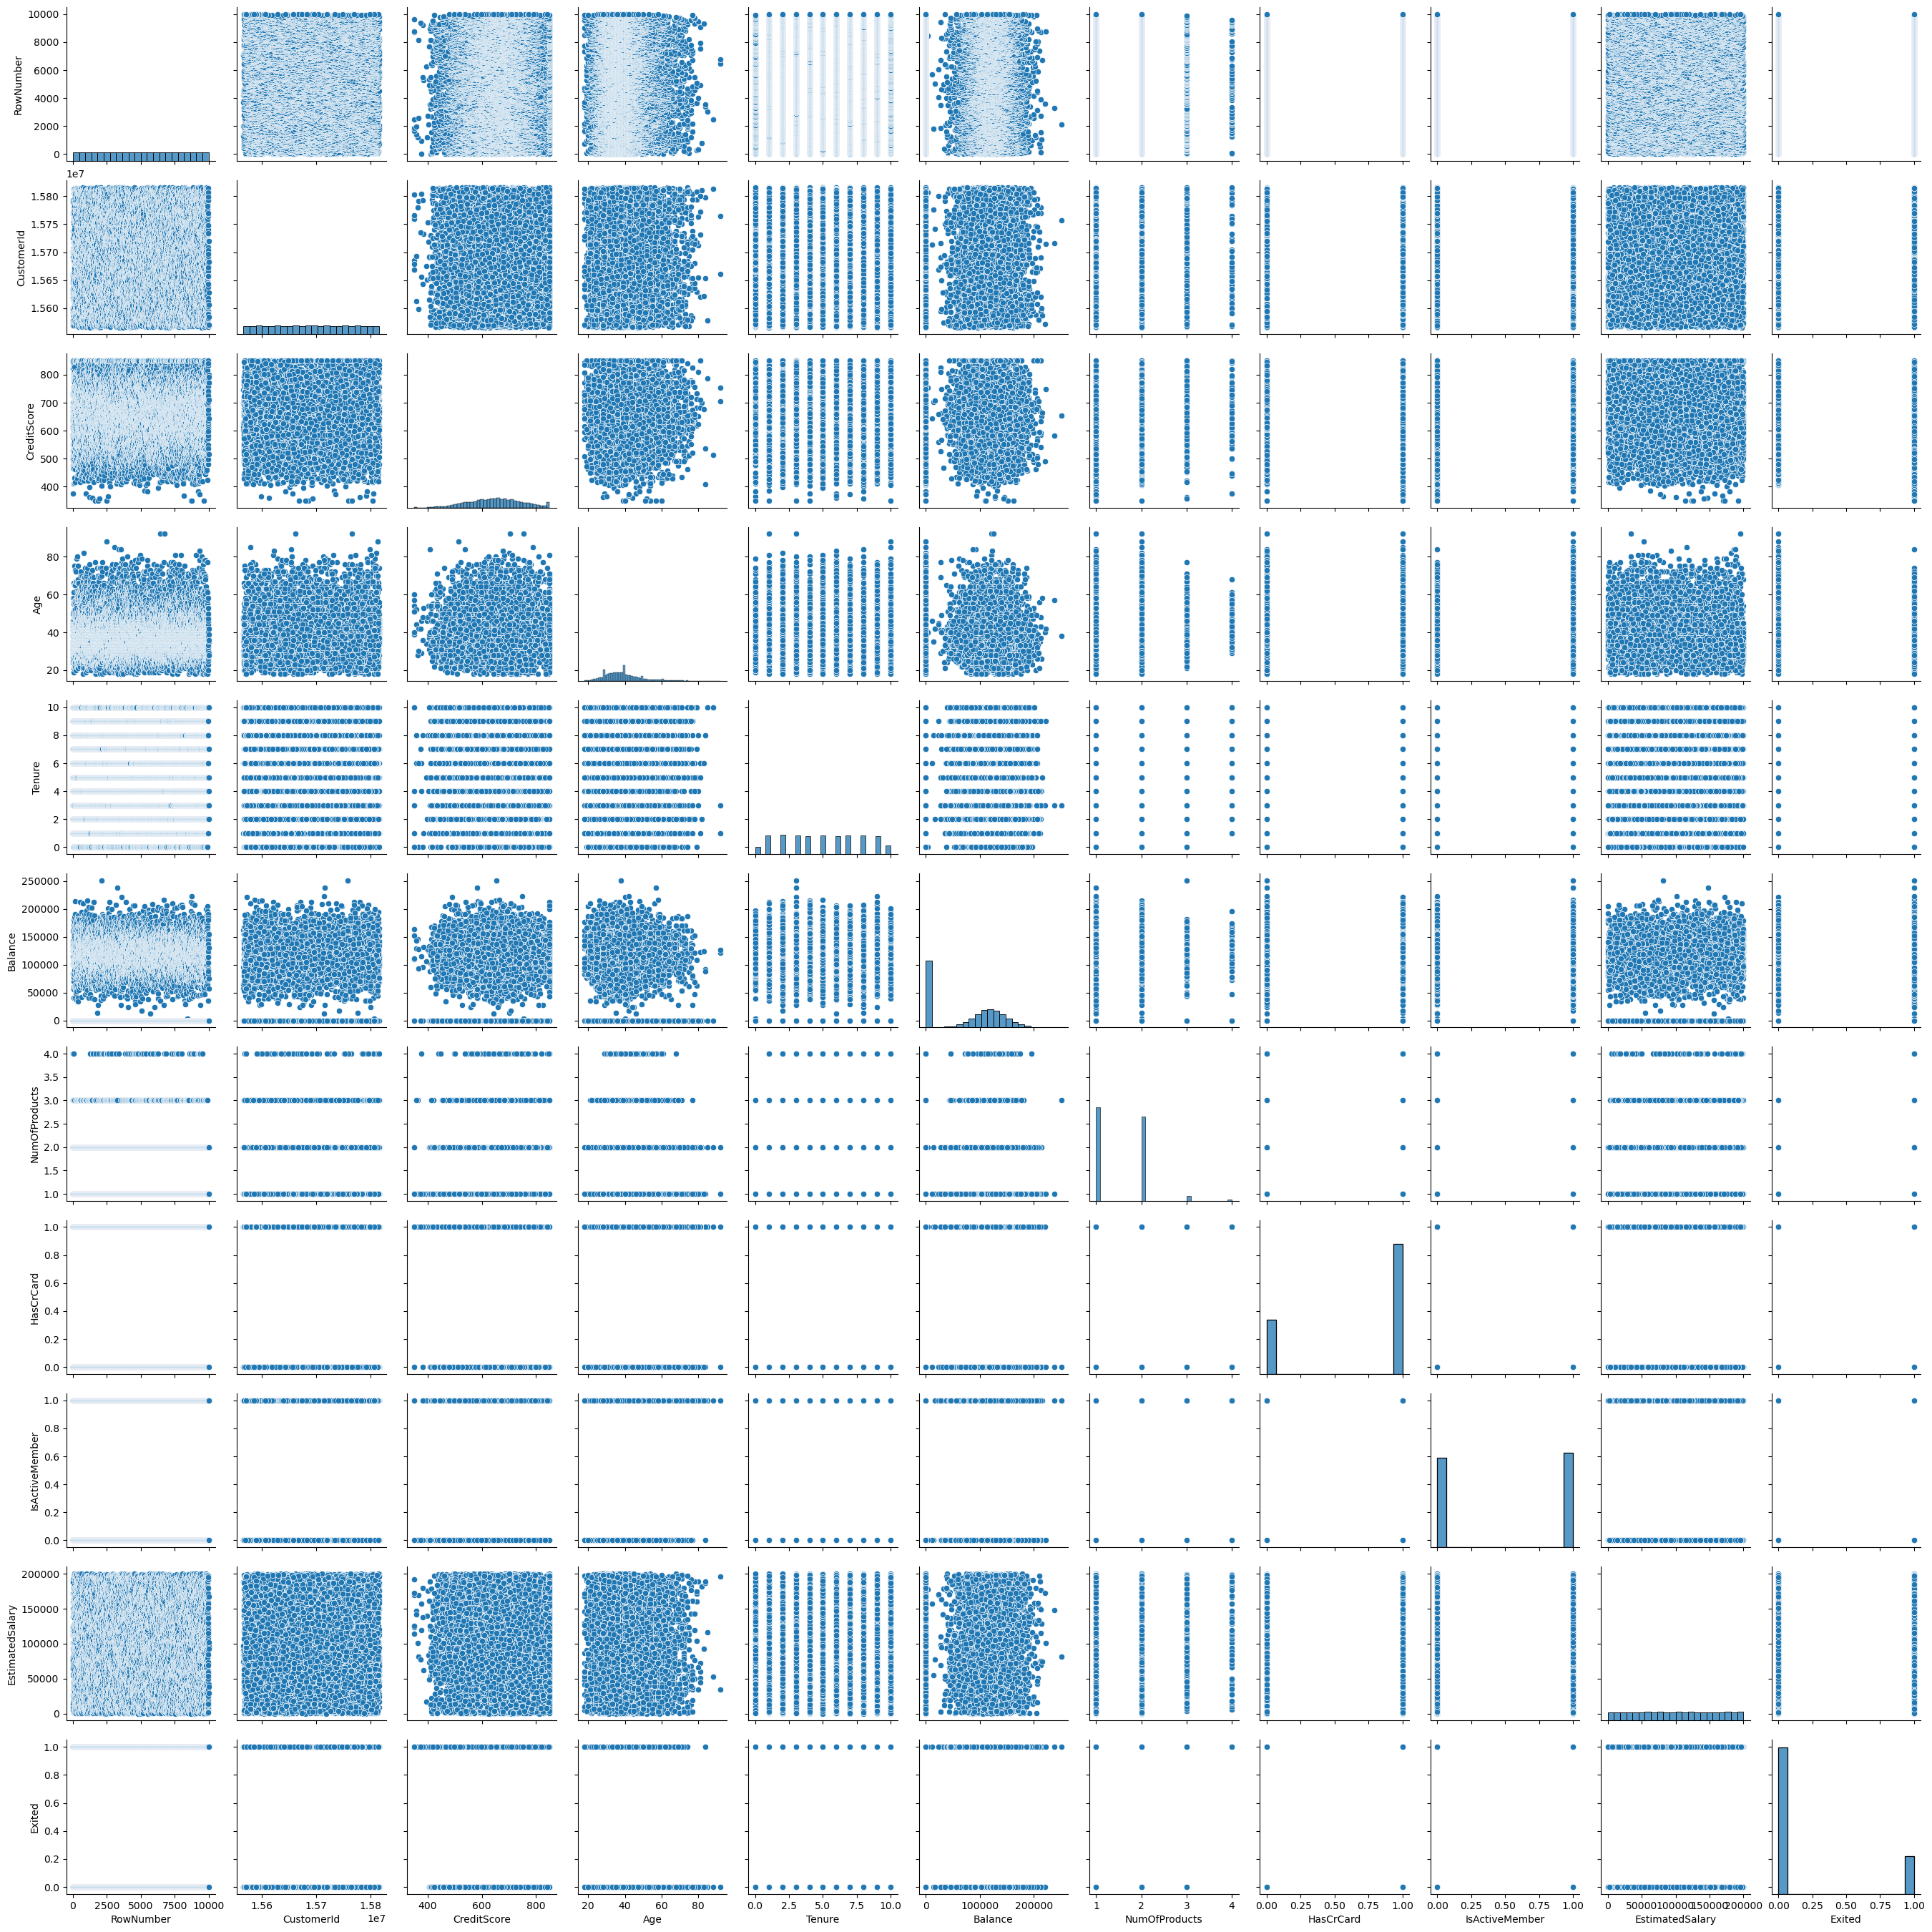

In [112]:
sns.pairplot(data = df)

In [113]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

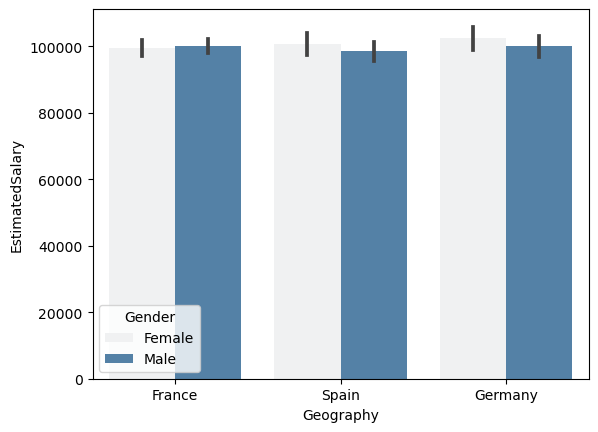

In [115]:
sns.barplot(data = df, x = 'Geography', y = 'EstimatedSalary', hue = 'Gender', color='steelblue')


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

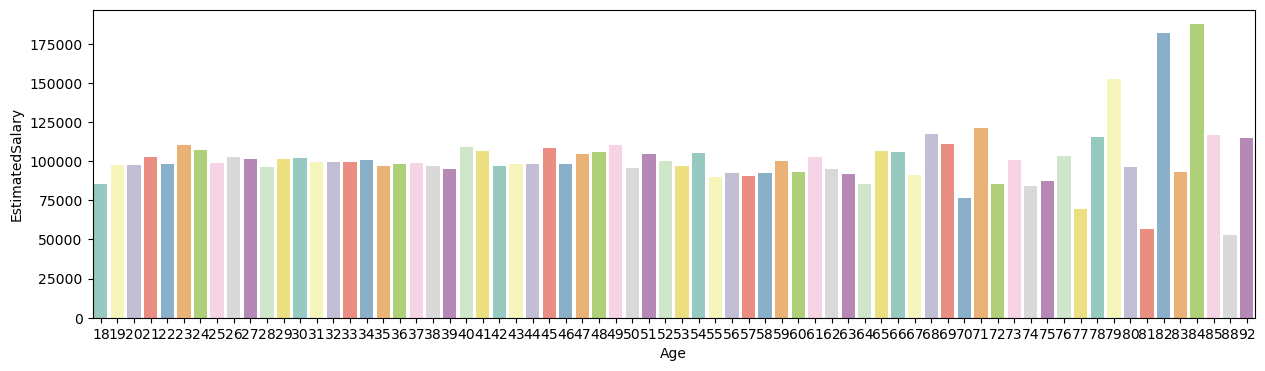

In [116]:
plt.figure(figsize = (15, 4))
sns.barplot(data = df, x = 'Age', y = 'EstimatedSalary', errorbar = None, palette = 'Set3')

<AxesSubplot:xlabel='Age', ylabel='count'>

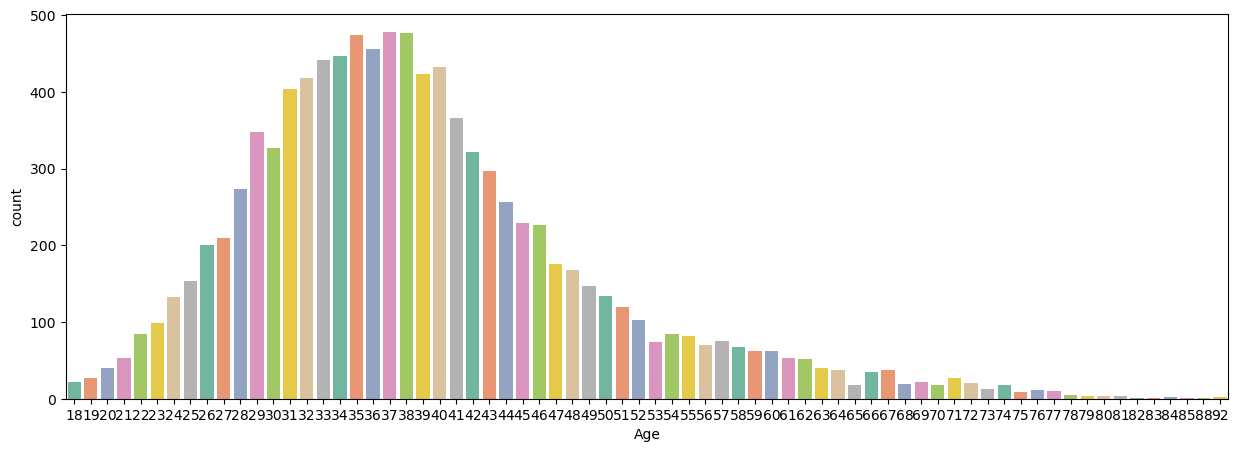

In [117]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'Age', palette = 'Set2')

<AxesSubplot:xlabel='Exited', ylabel='count'>

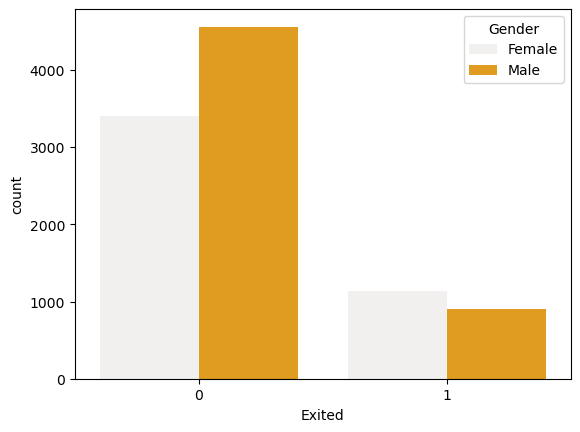

In [118]:
sns.countplot(data = df, x = 'Exited', hue = 'Gender', color = 'orange')

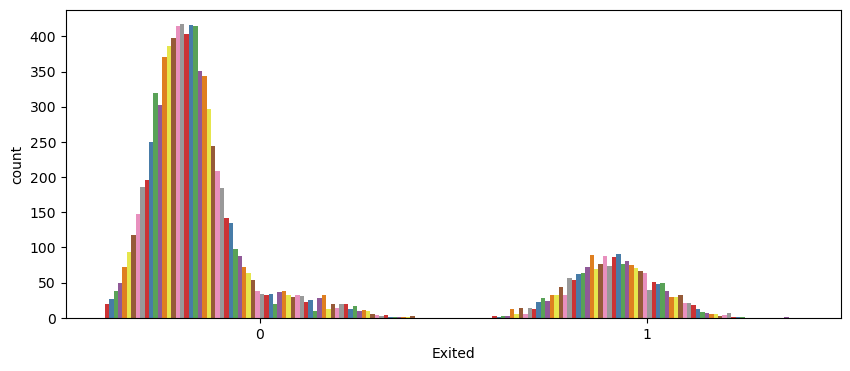

In [119]:
plt.figure(figsize = (10,4))
g=sns.countplot(data = df, x = 'Exited', hue = 'Age', palette = 'Set1')

g.legend_.remove()

In [120]:
df1 = df.copy()
age_groups = [range(age, age + 10) for age in range(0, 100, 10)]

age_group = []
age_range = []

for age in df1['Age']:
    for i, group in enumerate(age_groups):
        if age in group:
            age_group.append(i)
            age_range.append(group)
   
    
    
df1['Age_Group'] = age_group
df1['Age_Range'] = age_range

<AxesSubplot:xlabel='Exited', ylabel='count'>

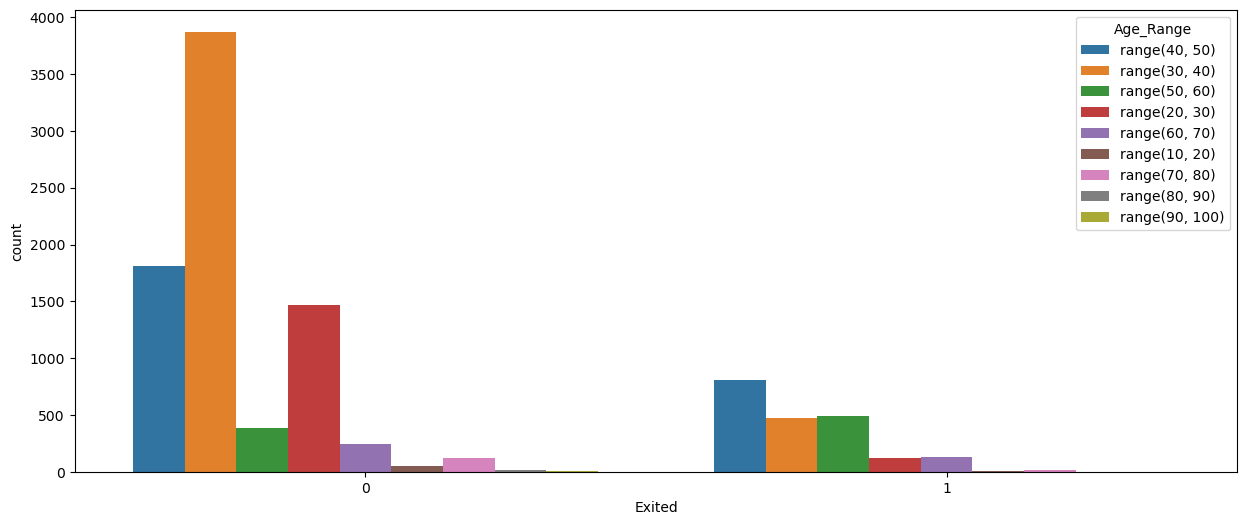

In [121]:
plt.figure(figsize = (15,6))
sns.countplot(x = "Exited", hue = 'Age_Range', data = df1)

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

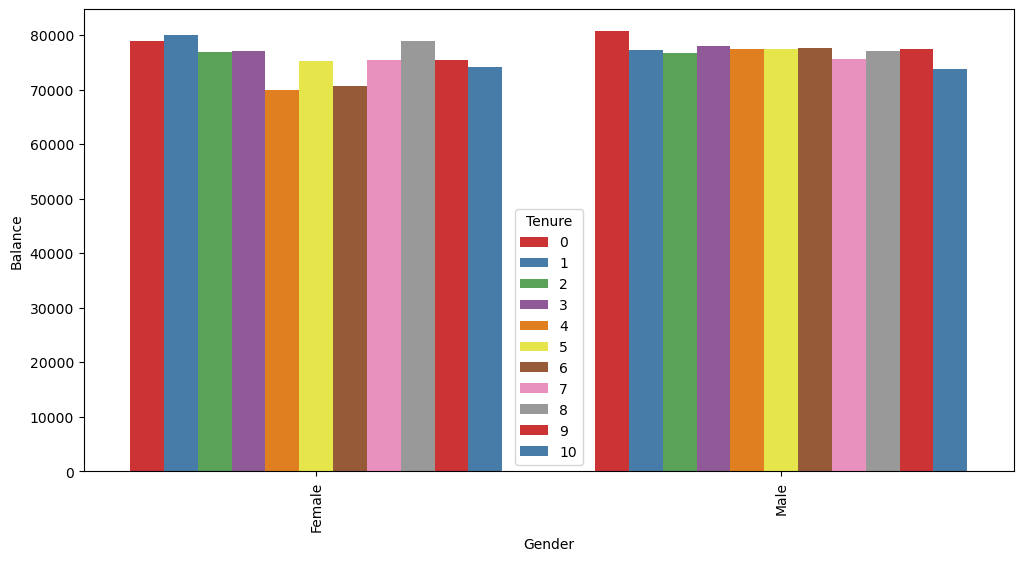

In [122]:
plt.figure(figsize = (12,6))
plt.xticks(rotation =90)
sns.barplot(data = df, x = 'Gender', y = 'Balance', hue = 'Tenure', palette = 'Set1', errorbar = None)

In [123]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

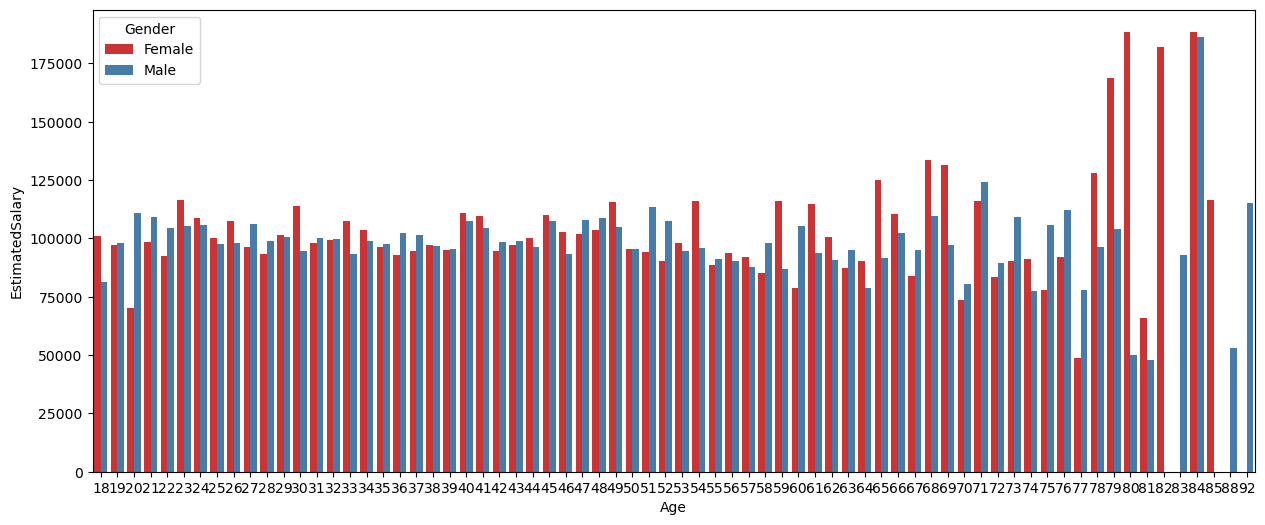

In [124]:
plt.figure(figsize = (15, 6))
sns.barplot(data = df, x = 'Age', y= 'EstimatedSalary', hue = 'Gender', palette = 'Set1', errorbar = None)

<AxesSubplot:xlabel='NumOfProducts', ylabel='EstimatedSalary'>

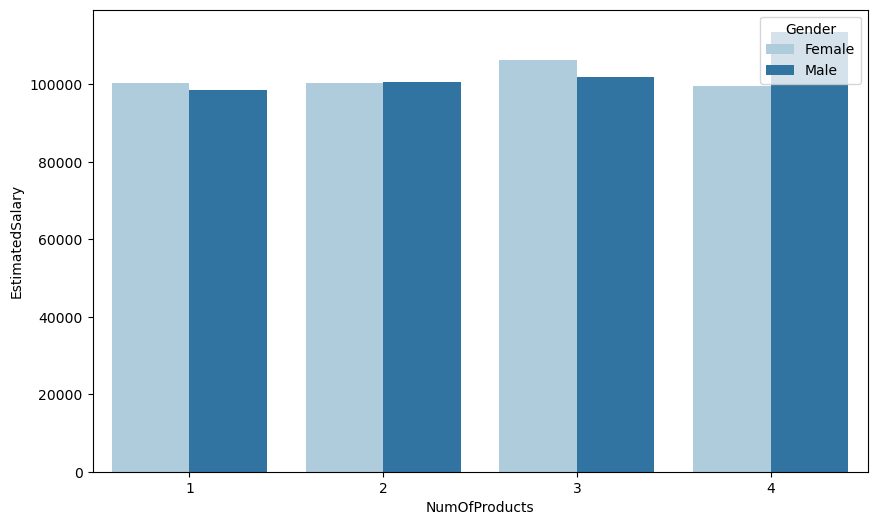

In [125]:
plt.figure(figsize = (10, 6))
sns.barplot(data = df, x = 'NumOfProducts', y= 'EstimatedSalary', hue = 'Gender', palette = 'Paired', errorbar = None ) 

<AxesSubplot:xlabel='Age', ylabel='Tenure'>

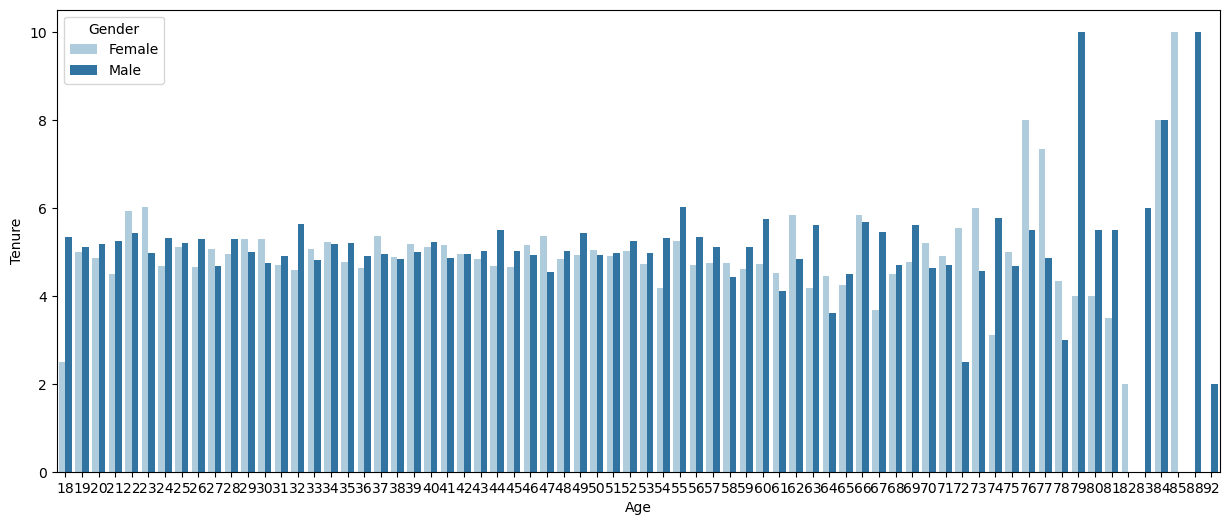

In [126]:
plt.figure(figsize = (15, 6))
sns.barplot(data = df, x = 'Age', y= 'Tenure', hue = 'Gender', palette = 'Paired', errorbar = None) 

In [127]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:xlabel='IsActiveMember', ylabel='EstimatedSalary'>

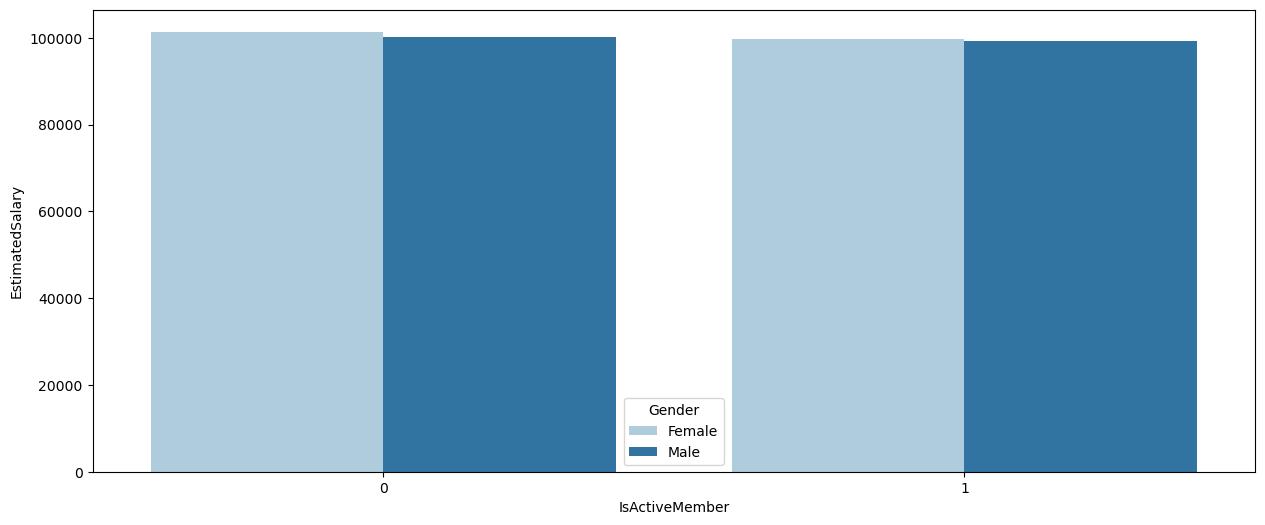

In [128]:
plt.figure(figsize = (15, 6))
sns.barplot(data = df, x = 'IsActiveMember', y= 'EstimatedSalary', hue = 'Gender', palette = 'Paired', errorbar = None)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

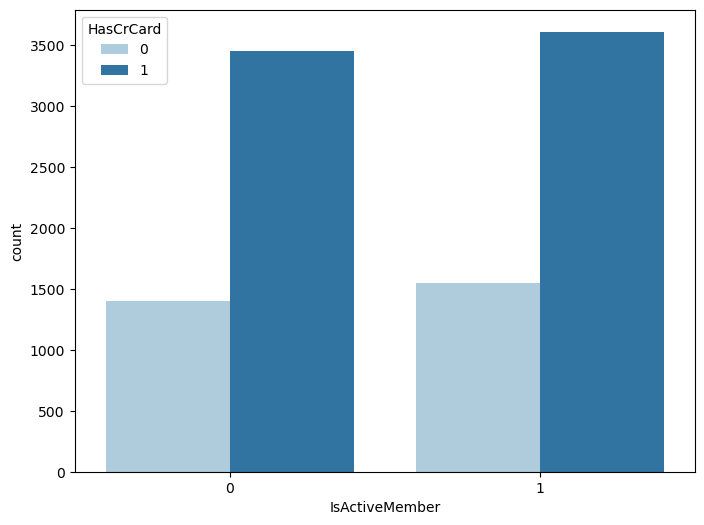

In [129]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'IsActiveMember', hue = 'HasCrCard', palette = 'Paired')

<AxesSubplot:xlabel='IsActiveMember', ylabel='Geography'>

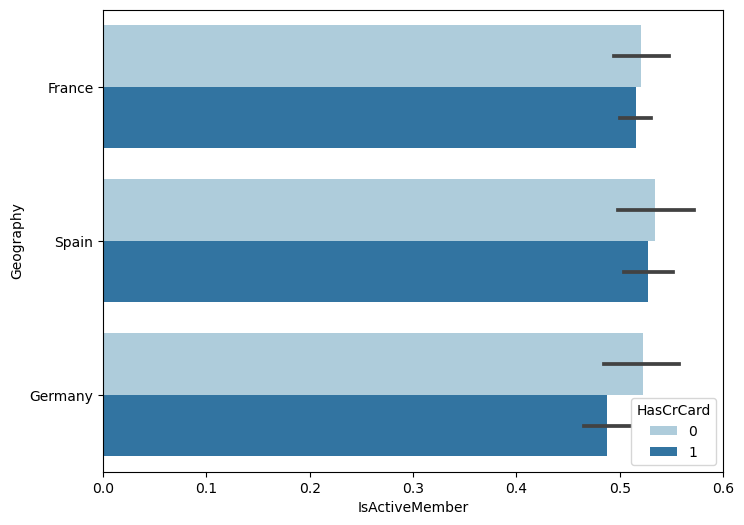

In [130]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df, x = 'IsActiveMember', y = 'Geography', hue = 'HasCrCard', palette = 'Paired')

<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

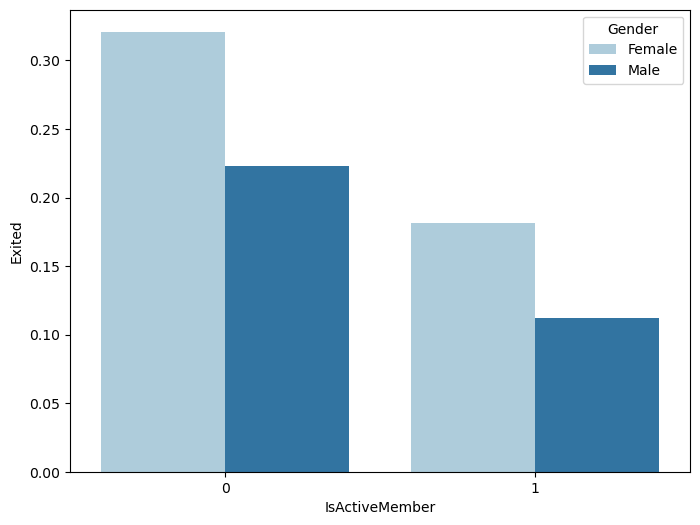

In [131]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df, x = 'IsActiveMember', y = 'Exited', hue = 'Gender', palette = 'Paired', errorbar = None)

# Data Preprocessing

In [132]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<h3> String to Numerical </h3>

In [135]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [134]:
df1 = df.copy()
le = LabelEncoder()

df1[['Geography','Gender']] = df1[['Geography','Gender']].apply(le.fit_transform)   

In [136]:
df1.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1


<h3> Drop Unnecessary Columns </h3>

In [137]:
df1.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1, inplace = True)

In [138]:
df1.shape

(10000, 11)

In [139]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


<h3> Distribution Plot </h3>

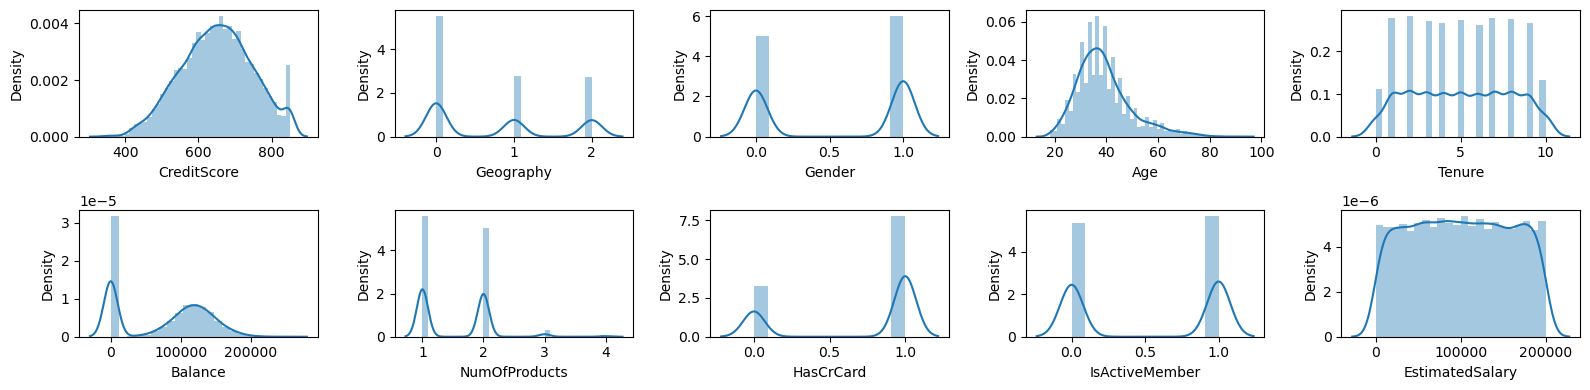

In [140]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(16,4))

col = df1.columns
index =0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df1[col[index]], ax = ax[i][j])
        index = index+1
plt.tight_layout()
        
    

<h3>Features and Targets</h3>

In [141]:
#Featurs
X = df1.copy()
X.drop(['Exited'], axis =1, inplace = True)
#X
print('shape of features X{}'.format(X.shape))

#Targets
y = df1['Exited']
#y
print('shape of target y{}'.format(y.shape))

shape of features X(10000, 10)
shape of target y(10000,)


<h3> Train and Test Splitting </h3>

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25, random_state = 42)

In [144]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9920,678,0,0,49,3,204510.94,1,0,1,738.88
1963,578,1,1,34,8,147487.23,2,1,0,66680.77
8243,825,0,1,29,3,148874.01,2,0,1,71192.82
6590,696,2,0,30,0,0.00,2,1,1,9002.80
8847,457,0,1,40,10,134320.23,2,1,0,150757.35
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,682,0,0,58,1,0.00,1,1,1,706.50
5390,735,0,0,38,1,0.00,3,0,0,92220.12
860,667,0,1,43,8,190227.46,1,1,0,97508.04


In [145]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30
1731,601,2,0,44,4,0.00,2,1,0,58561.31
4742,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,0,27,7,124995.98,1,1,1,114669.79
6340,790,2,1,37,8,0.00,2,1,1,149418.41
576,439,2,0,32,3,138901.61,1,1,0,75685.97
5202,597,1,0,22,6,101528.61,1,1,0,70529.00
6363,678,2,0,40,4,113794.22,1,1,0,16618.76
439,464,1,0,42,3,85679.25,1,1,1,164104.74


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Define Model Function and Build Model</p>

<h2>Define Model</h2>

In [146]:
def define_model(models):
    print("Model Name: ", models)
    model = models.fit(X_train, y_train)
    print("======================================================")
    print("TRAIN DATASET")
    #predition on trainset
    y_train_pred = model .predict(X_train)
    print('predicted value of trainset:', '\n', (y_train_pred))

    #accuracy score on trainset
    print("training accuracy: {:.3f}".format(accuracy_score(y_train, y_train_pred)))

    #ROC_AUC Score
    print('roc_auc score for training: {:.3f}'.format(roc_auc_score(y_train, y_train_pred)))

    #confusion matrix for trainingset
    print("Cofusion Matrix for Trainset:", "\n", (confusion_matrix(y_train, y_train_pred)))

    print("======================================================")
    print("TEST DATASET")
    #predition on testset
    y_test_pred = model.predict(X_test)
    print('predicted value of testset:', '\n', (y_test_pred))

    #accuracy score on testset
    print("testing accuracy {:.3f}".format(accuracy_score(y_test, y_test_pred)))

    #ROC_AUC Score
    print('roc_auc score for testng: {:.3f}'.format(roc_auc_score(y_test, y_test_pred)))


    #confusion matrix for testset
    print("Cofusion Matrix for Trainset :", "\n", (confusion_matrix(y_train, y_train_pred)))


    #wrong prediction for testset
    print('Wrong Prediction Made')
    print((y_test != y_test_pred).sum(), '/', ((y_test == y_test_pred).sum() + (y_test != y_test_pred).sum()))
    print("Kappa Score for testing: {:.3f}".format(metrics.cohen_kappa_score(y_test, y_test_pred)))



<h2>Logistic Regression</h2>

In [147]:
lr = LogisticRegression()
define_model(lr)

Model Name:  LogisticRegression()
TRAIN DATASET
predicted value of trainset: 
 [0 0 0 ... 0 0 0]
training accuracy: 0.790
roc_auc score for training: 0.517
Cofusion Matrix for Trainset: 
 [[7765  178]
 [1917  115]]
TEST DATASET
predicted value of testset: 
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
testing accuracy 0.760
roc_auc score for testng: 0.475
Cofusion Matrix for Trainset : 
 [[7765  178]
 [1917  115]]
Wrong Prediction Made
6 / 25
Kappa Score for testing: -0.071


<h2>Gaussian NB</h2>

In [148]:
gaussian = GaussianNB()
define_model(gaussian)

Model Name:  GaussianNB()
TRAIN DATASET
predicted value of trainset: 
 [0 0 0 ... 0 0 0]
training accuracy: 0.785
roc_auc score for training: 0.522
Cofusion Matrix for Trainset: 
 [[7669  274]
 [1874  158]]
TEST DATASET
predicted value of testset: 
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
testing accuracy 0.760
roc_auc score for testng: 0.475
Cofusion Matrix for Trainset : 
 [[7669  274]
 [1874  158]]
Wrong Prediction Made
6 / 25
Kappa Score for testing: -0.071


<h2>DecisionTreeClassifier</h2>

In [149]:
dtc = DecisionTreeClassifier()
define_model(dtc)

Model Name:  DecisionTreeClassifier()
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 0]
training accuracy: 1.000
roc_auc score for training: 1.000
Cofusion Matrix for Trainset: 
 [[7943    0]
 [   0 2032]]
TEST DATASET
predicted value of testset: 
 [0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
testing accuracy 0.840
roc_auc score for testng: 0.675
Cofusion Matrix for Trainset : 
 [[7943    0]
 [   0 2032]]
Wrong Prediction Made
4 / 25
Kappa Score for testing: 0.412


<h2>RandomForestClassifier</h2>

In [150]:
rfc = RandomForestClassifier()
define_model(rfc)

Model Name:  RandomForestClassifier()
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 0]
training accuracy: 1.000
roc_auc score for training: 1.000
Cofusion Matrix for Trainset: 
 [[7943    0]
 [   1 2031]]
TEST DATASET
predicted value of testset: 
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
testing accuracy 0.920
roc_auc score for testng: 0.800
Cofusion Matrix for Trainset : 
 [[7943    0]
 [   1 2031]]
Wrong Prediction Made
2 / 25
Kappa Score for testing: 0.706


<h2>KNeighborsClassifier</h2>

In [151]:
knn = KNeighborsClassifier()
define_model(knn)

Model Name:  KNeighborsClassifier()
TRAIN DATASET
predicted value of trainset: 
 [0 1 0 ... 0 1 0]
training accuracy: 0.816
roc_auc score for training: 0.596
Cofusion Matrix for Trainset: 
 [[7689  254]
 [1577  455]]
TEST DATASET
predicted value of testset: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
testing accuracy 0.800
roc_auc score for testng: 0.500
Cofusion Matrix for Trainset : 
 [[7689  254]
 [1577  455]]
Wrong Prediction Made
5 / 25
Kappa Score for testing: 0.000


<h2>Support Vector Classifier</h2>

In [152]:
svc = SVC(kernel = 'linear')
define_model(svc)

Model Name:  SVC(kernel='linear')
TRAIN DATASET
predicted value of trainset: 
 [0 0 0 ... 0 0 0]
training accuracy: 0.779
roc_auc score for training: 0.508
Cofusion Matrix for Trainset: 
 [[7672  271]
 [1930  102]]
TEST DATASET
predicted value of testset: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
testing accuracy 0.760
roc_auc score for testng: 0.475
Cofusion Matrix for Trainset : 
 [[7672  271]
 [1930  102]]
Wrong Prediction Made
6 / 25
Kappa Score for testing: -0.071


<h2>XGBOOST</h2>

In [153]:
xgb = xgb.XGBClassifier()
define_model(xgb)

Model Name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 0]
training accuracy: 0.941
roc_auc score for training: 0.868
Cofusion Matrix for Trainset: 
 [[7868   75]
 [ 517 1515]]
TEST DATASET
predicted value of testset: 
 [0 0 0 0 0 0 0 0 0 0 1

# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Classification Model Comparision</p>

<h3>different model compare</h3>

In [154]:
def comparing_models():
    models = [lr, gaussian, dtc, rfc, knn, svc, xgb]
    model_list = ["Logistic Regression", "Naive Bayes(GaussianNB)", "DecisionTreeClassifire", "RandomForestClassifier", 
              "KNeighborsClassifier", "Support Vector Classifier", "XGBOOST" ]

    model_columns = []

    models_compare = pd.DataFrame(columns = model_columns)

    row_index =0

    for model_name, ml in zip(model_list, models):
    
        ml.fit(X_train, y_train)
        y_test_pred = ml.fit(X_train, y_train).predict(X_test)
    
        models_compare.loc[row_index, "Model Name"] = model_name
        models_compare.loc[row_index, "Train Accuracy"] = round(ml.score(X_train, y_train), 3)
        models_compare.loc[row_index, "Test Accuracy"] = round(ml.score(X_test, y_test),3)
        models_compare.loc[row_index, "roc_auc_score"] = round(roc_auc_score(y_test, y_test_pred),3)
        row_index+=1

    models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
    
    return models_compare


In [166]:
comparing_models()

,Model Name,Train Accuracy,Test Accuracy,roc_auc_score
2,DecisionTreeClassifire,1.000,0.92,0.800
3,RandomForestClassifier,1.000,0.92,0.800
6,XGBOOST,0.941,0.92,0.800
4,KNeighborsClassifier,0.816,0.80,0.500
0,Logistic Regression,0.790,0.76,0.475
1,Naive Bayes(GaussianNB),0.785,0.76,0.475
5,Support Vector Classifier,0.779,0.76,0.475


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Hyperparameter Tuning with Best Model(RandomForestClassifier)</p>

In [84]:
#RandomForest with Hyperparameters tunig

rfc1 = RandomForestClassifier(n_estimators = 500, min_samples_split = 2,  min_samples_leaf=1, 
                             max_features="sqrt", random_state = 42, verbose = 2, max_samples = 100)

define_model(rfc1)


Model Name:  RandomForestClassifier(max_features='sqrt', max_samples=100, n_estimators=500,
                       random_state=42, verbose=2)
building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


predicted value of trainset: 
 [0 0 0 ... 0 0 0]
training accuracy: 0.842
roc_auc score for training: 0.624
Cofusion Matrix for Trainset: 
 [[7881   62]
 [1512  520]]
TEST DATASET
predicted value of testset: 
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
testing accuracy 0.880
roc_auc score for testng: 0.700
Cofusion Matrix for Trainset : 
 [[7881   62]
 [1512  520]]
Wrong Prediction Made
3 / 25
Kappa Score for testing: 0.516


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Hyperparameter Tuning with RandomSearchCV</p>

In [85]:
#no of Trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 5000, num = 10)]

#Number of Features Every Split
max_features = ['auto', 'sqrt', 'log2']

#max number bruches / levels in the tree
max_depth = [int(x) for x in np.linspace(10, 2000, 10)]

#minimum number of samples required to split a node
min_samples_split = [2,5,10,14]

#Minimum number of samples at each leaf
min_samples_leaf = [1,2,4,6,8]

#Create the random grid

random_grid = {'n_estimators'  : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'criterion' : ['entropy', 'gini']}

In [86]:
rfc = RandomForestClassifier()
rfc_randomCV = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                                 n_iter = 100, cv = 5, verbose = 2, 
                                  random_state = 42, n_jobs = -1)
rfc_randomCV.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=gini, max_depth=452, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=452, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=452, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=231, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END criterion=entropy, max_depth=231, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END criterion=entropy, max_depth=1778, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=100; total time=   1.8s
[CV] END criterion=entropy, max_depth=1778, max_features=log2, min_samples_leaf=8, min_samples_spli

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 231, 452, 673, 894,
                                                      1115, 1336, 1557, 1778,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 644, 1188, 1733,
                                                         2277, 2822, 3366, 3911,
                                                         4455, 5000]},
                   random_state=42, verbose=2)

In [88]:
rfc_randomCV.best_params_

{'n_estimators': 1733,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 1557,
 'criterion': 'gini'}

In [90]:
rfc_randomCV.best_estimator_

RandomForestClassifier(max_depth=1557, min_samples_split=14, n_estimators=1733)

In [92]:
best_random_cv = rfc_randomCV.best_estimator_
define_model(best_random_cv)

Model Name:  RandomForestClassifier(max_depth=1557, min_samples_split=14, n_estimators=1733)
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 0]
training accuracy: 0.917
roc_auc score for training: 0.810
Cofusion Matrix for Trainset: 
 [[7862   81]
 [ 751 1281]]
TEST DATASET
predicted value of testset: 
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
testing accuracy 0.920
roc_auc score for testng: 0.800
Cofusion Matrix for Trainset : 
 [[7862   81]
 [ 751 1281]]
Wrong Prediction Made
2 / 25
Kappa Score for testing: 0.706

[CV] END criterion=gini, max_depth=1115, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=4455; total time= 1.0min
[CV] END criterion=entropy, max_depth=1778, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=3911; total time= 1.0min
[CV] END criterion=entropy, max_depth=1778, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=3911; total time= 1.0min


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Hyperparameter Tuning with GridSeachCV</p>

In [98]:
param_grid = {
    'criterion' : [rfc_randomCV.best_params_['criterion']],
    'max_depth' : [rfc_randomCV.best_params_['max_depth']],
    'max_features':[rfc_randomCV.best_params_['max_features']],
    
    'min_samples_leaf' : [rfc_randomCV.best_params_['min_samples_leaf'],
                         rfc_randomCV.best_params_['min_samples_leaf']+2,
                         rfc_randomCV.best_params_['min_samples_leaf']+4],
    
    'min_samples_split'  :[rfc_randomCV.best_params_['min_samples_split'],
                        rfc_randomCV.best_params_['min_samples_split']-2,
                        rfc_randomCV.best_params_['min_samples_split']+2,],
    
    'n_estimators' : [rfc_randomCV.best_params_['n_estimators'],
                      rfc_randomCV.best_params_['n_estimators']-100,
                      rfc_randomCV.best_params_['n_estimators']+100]}
                           
                           


In [99]:
rfc = RandomForestClassifier()

rfc_gridCV = GridSearchCV(estimator = rfc, param_grid = param_grid,
                          n_jobs = 1, verbose =2)

rfc_gridCV.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END criterion=gini, max_depth=1557, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1733; total time=  17.3s
[CV] END criterion=gini, max_depth=1557, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1733; total time=  16.9s
[CV] END criterion=gini, max_depth=1557, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1733; total time=  17.1s
[CV] END criterion=gini, max_depth=1557, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1733; total time=  17.3s
[CV] END criterion=gini, max_depth=1557, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1733; total time=  16.6s
[CV] END criterion=gini, max_depth=1557, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1633; total time=  16.5s
[CV] END criterion=gini, max_depth=1557, max_features=auto, min_samples_leaf=1, min_samples_split=

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [1557],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [14, 12, 16],
                         'n_estimators': [1733, 1633, 1833]},
             verbose=2)

In [100]:
rfc_gridCV.best_params_

{'criterion': 'gini',
 'max_depth': 1557,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 1833}

In [102]:
rfc_gridCV.best_estimator_


RandomForestClassifier(max_depth=1557, min_samples_split=12, n_estimators=1833)

In [103]:
best_grid_cv = rfc_gridCV.best_estimator_
define_model(best_grid_cv)

Model Name:  RandomForestClassifier(max_depth=1557, min_samples_split=12, n_estimators=1833)
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 0]
training accuracy: 0.924
roc_auc score for training: 0.826
Cofusion Matrix for Trainset: 
 [[7872   71]
 [ 688 1344]]
TEST DATASET
predicted value of testset: 
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
testing accuracy 0.920
roc_auc score for testng: 0.800
Cofusion Matrix for Trainset : 
 [[7872   71]
 [ 688 1344]]
Wrong Prediction Made
2 / 25
Kappa Score for testing: 0.706


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Summary</p>

GridSearCV is showing better result than RandomSearchCV. 

# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Save and Load Model</p>

In [158]:
import pickle

<h2> Save Model </h2>

In [159]:
pickle.dump(rfc_gridCV, open('grid_model.pkl', 'wb'))

<h2> Load Model </h2>

In [162]:
pickled_model = pickle.load(open('grid_model.pkl', 'rb'))
y_pred = pickled_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [165]:
pickled_model.score(X_test, y_test)

0.92